## **IMPORT LIBRARY**
* import cv2 : Membaca, memproses, dan menampilkan citra menggunakan OpenCV.
* import numpy as np : Operasi numerik, termasuk manipulasi matriks dan pembuatan noise.
* import matplotlib.pyplot as plt : Menampilkan hasil pemrosesan citra dalam bentuk grafik.



In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Menambahkan noise salt & pepper pada setiap gambar**
Fungsi add_salt_and_pepper_noise menambahkan noise salt and pepper pada citra dengan probabilitas tertentu, mengganti beberapa piksel dengan warna hitam atau putih. Fungsi add_gaussian_noise menambahkan noise Gaussian pada citra dengan distribusi normal berdasarkan nilai mean dan variansi yang diberikan.

In [51]:
def add_salt_and_pepper_noise(image, prob=0.02):
    """Menambahkan noise salt and pepper pada citra."""
    output = np.copy(image)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rand = np.random.rand()
            if rand < prob:
                output[i][j] = 0  # Black pixel (pepper)
            elif rand > thres:
                output[i][j] = 255  # White pixel (salt)
    return output

# **Menerapkan Median Filtering untuk menghilangkan noise**
Fungsi apply_median_filter menerapkan median filter untuk menghilangkan noise dengan mengganti nilai piksel dengan median dari tetangganya. Fungsi apply_mean_filter menerapkan mean filter untuk menghaluskan citra dengan menggantikan nilai piksel dengan rata-rata dari jendela sekitarnya.

In [52]:
def apply_median_filter(image, kernel_size=3):
    """Menerapkan median filter pada citra."""
    return cv2.medianBlur(image, kernel_size)

# **Menampilkan hasil dalam grid 3x3 untuk perbandingan**
Fungsi process_image membaca citra dari path yang diberikan, menambahkan noise salt & pepper serta Gaussian, kemudian menerapkan median dan mean filtering, lalu menampilkan hasilnya dengan matplotlib.

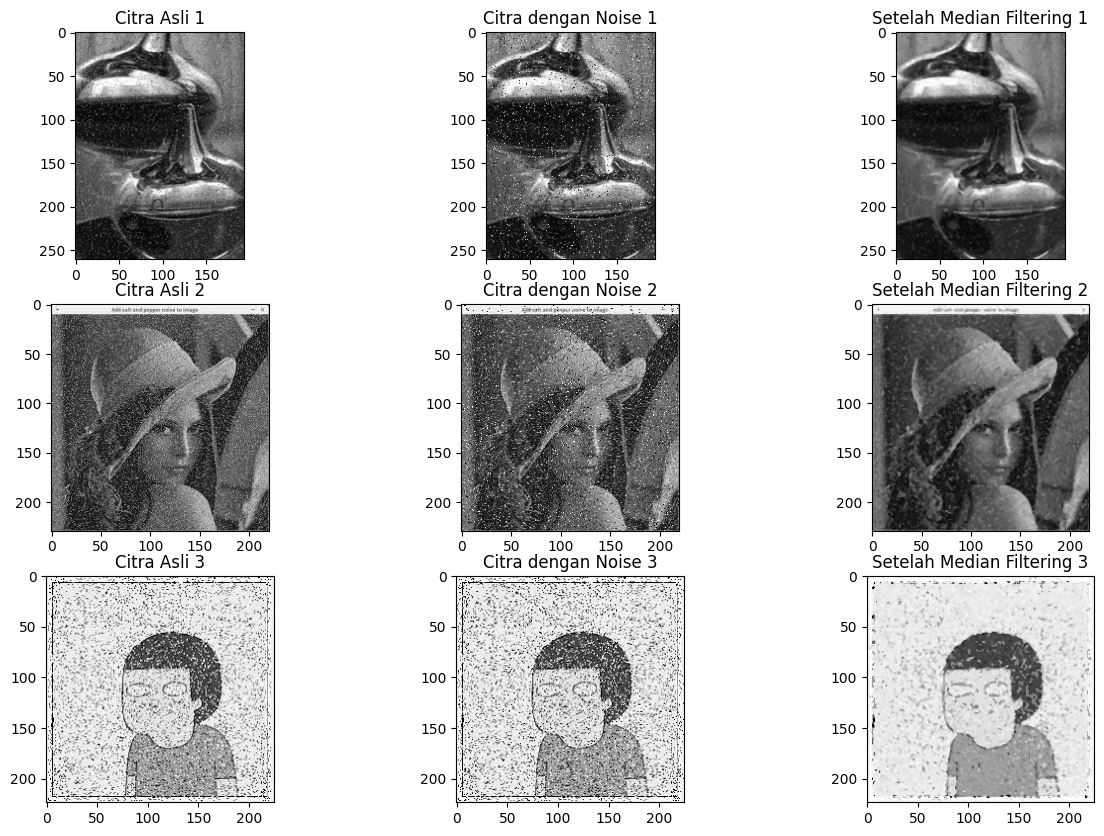

In [53]:
def process_images(image_paths):
    """Membaca beberapa citra, menambahkan noise, dan menerapkan median filtering."""
    images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]

    for i, image in enumerate(images):
        if image is None:
            print(f"Gambar {image_paths[i]} tidak ditemukan!")
            return

    noisy_images = [add_salt_and_pepper_noise(img) for img in images]
    filtered_images = [apply_median_filter(noisy_img) for noisy_img in noisy_images]

    plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i], cmap='gray'), plt.title(f'Citra Asli {i+1}')
        plt.subplot(3, 3, i * 3 + 2), plt.imshow(noisy_images[i], cmap='gray'), plt.title(f'Citra dengan Noise {i+1}')
        plt.subplot(3, 3, i * 3 + 3), plt.imshow(filtered_images[i], cmap='gray'), plt.title(f'Setelah Median Filtering {i+1}')

    plt.show()

# Contoh penggunaan
image_paths = ["/content/download (3).jpg", "/content/download (1).jpg", "/content/download (2).jpg"]  # Ganti dengan path gambar yang sesuai
process_images(image_paths)